In [1]:
using Plots

include("../src/model.jl")
include("../src/datasets.jl")

### Generate data

In [2]:
N, T = 200, 500
H_sparsity, noise_scale = 0.99, 0.5
lag = 20

data_k3 = gen_synthetic(K=3, L=lag, N=N, T=T, 
                        H_sparsity=H_sparsity,
                        noise_scale=noise_scale)
data_k5 = gen_synthetic(K=5, L=lag, N=N, T=T,
                        H_sparsity=H_sparsity,
                        noise_scale=noise_scale)
;

### Fit data by sweeping over several parameter values

In [3]:
# Fit dataset with 3 components
k_sweep = 1:6

all_results_k3 = parameter_sweep(
    data_k3,
    K_vals=k_sweep, L_vals=[lag], alg_vals=[:hals],
    max_time=10, max_itr=1_000_000
)

all_results_k5 = parameter_sweep(
    data_k5,
    K_vals=k_sweep, L_vals=[lag], alg_vals=[:hals],
    max_time=10, max_itr=1_000_000
)
;

### Plot results

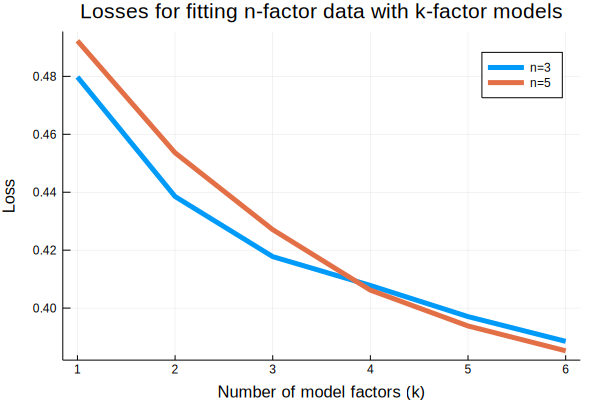

In [4]:
losses_k3 = [all_results_k3[(lag, k, :hals)].loss_hist[end] for k in k_sweep]
losses_k5 = [all_results_k5[(lag, k, :hals)].loss_hist[end] for k in k_sweep]


plot(
    xlabel="Number of model factors (k)", ylabel="Loss",
    title="Losses for fitting n-factor data with k-factor models"
)

plot!(k_sweep, losses_k3, label="n=3", lw=5)
plot!(k_sweep, losses_k5, label="n=5", lw=5)